# Set-up

In [1]:
# imports
import os
import sys
import pickle
import numpy as np
import pandas as pd
import scanpy as sc
import mudata
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import pearsonr
from matplotlib_venn import venn3

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed')).History will not be written to the database.


In [3]:
path_out = "/cellar/users/aklie/data/datasets/tf_perturb_seq/scratch/2026_01_05"

os.makedirs(path_out, exist_ok=True)

# CRISPR pipeline output

In [ ]:
path_mdata = "/cellar/users/aklie/data/datasets/tf_perturb_seq/datasets/Hon_WTC11-benchmark_TF-Perturb-seq/results/1_CRISPR_pipeline/2026_01_05/inference_mudata.h5mu"
mdata = mudata.read_h5mu(path_mdata)

/cellar/users/aklie/opt/miniconda3/envs/scverse-lite-py311/lib/python3.11/site-packages/mudata/_core/mudata.py:1598: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behaviour, which will become the default. Use new pull_obs/pull_var and push_obs/push_var methods for more flexibility.
  self._update_attr("var", axis=0, join_common=join_common)
/cellar/users/aklie/opt/miniconda3/envs/scverse-lite-py311/lib/python3.11/site-packages/mudata/_core/mudata.py:1461: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behaviour, which will become the default. Use new pull_obs/pull_var and push_obs/push_var methods for more flexibility.
  self._update_attr("obs", axis=1, join_common=join_common)


In [5]:
guide = mdata["guide"]
crispr_df = guide[guide.obs["batch"] == "IGVFDS6244NAXC", ].copy().to_df()
crispr_df.index = crispr_df.index.str.split("_").str[0]
crispr_df.head()

guide_id,CD81#strong,CD81#weak,CD151#strong,CD151#weak,CD55#strong,NGFRAP1#B,NGFRAP1#A,TFRC#A,non-targeting_00642,non-targeting_00718,...,TCF7#chr5:134115497-134115515(+),TCF7#chr5:134114704-134114722(+),TCF7#chr5:134115500-134115518(+),TCF7#chr5:134114765-134114783(-),TFCP2L1#chr2:121285117-121285135(+),TFCP2L1#chr2:121284700-121284718(+),TFCP2L1#chr2:121285141-121285159(+),TFCP2L1#chr2:121284796-121284814(+),TFCP2L1#chr2:121285161-121285179(+),TFCP2L1#chr2:121284793-121284811(-)
GATGAAATCAGCTCGG,2.0,3.0,2.0,2.0,0.0,2.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TGCCCTACACGGTAAG,1.0,1.0,0.0,6.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTTGTCATCTGCAAGT,1835.0,1.0,2.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AGAGTGGGTCTAGCCG,0.0,3.0,1.0,2.0,2.0,3.0,2.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
AGATTGCTCCCACTTG,1.0,1.0,0.0,1.0,1.0,0.0,3.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
# Sanity checks
np.all(guide.obs["total_guide_umis"] == np.sum(guide.X, axis=1).A1), np.all(guide.obs["num_expressed_guides"] == np.sum(guide.X > 0, axis=1).A1)

(np.True_, np.True_)

#  FBA output

In [7]:
path_pickle = "/cellar/users/aklie/data/datasets/tf_perturb_seq/datasets/Hon_WTC11-benchmark_TF-Perturb-seq/results/2_qc/2025_12_16/LW591_IGVFDS6244NAXC/sgRNA_DF_sgDropNaN.pkl"
hon_df = pd.read_pickle(path_pickle).T
hon_df.index = hon_df.index.str.split("-").str[0]
hon_df

,CD151:1_ACCACGCGTCCGAGTCCGG,CD151:2_CGACAGCTCGGCCGAGCGG,CD55_GGACTCCGCCGAGTCGCAG,CD81:1_CCGTTGCGCGCTCGCTCTC,CD81:2_CCGTTGCGCGCTGGCTCTC,NGFRAP1:1_GAGGAGGGCAAACTCCAAC,NGFRAP1:2_TGTCACTCTTCTCGGTCCT,TFRC_GATATCCCGACGCTCTGAG,chr10:112950246-112950264(-)_TGTCAATAATCTCCGCTCC,chr10:112950261-112950279(-)_CTCCCAGACTACTCCGTTC,...,non-targeting_02829_AGGCCGACCTCACTGATCC,non-targeting_03129_CCCCTCGGCTGATGCCGGT,non-targeting_03306_AGCTCCATACGGCCGTACA,non-targeting_03347_GATACGACCGCCGTATATA,non-targeting_03368_CCGGTCTCTGGCTCGAACC,non-targeting_03484_CGCGGTGTTGCCGACACCC,non-targeting_03631_ACGTTCTTGCAGACGCGTC,non-targeting_03639_GGTTACGGCGTGGCGGGCC,non-targeting_03705_CGTGCCGCGGGTCCATGCC,non-targeting_03783_TGTCGTTCGATCCTAGCTC
AAACCTGAGAAACCTA,0,545,2,0,0,5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAACCTGAGACAAAGG,0,12,4,7,19,2,3,0,4,3,...,0,0,2,0,1,0,3,2,0,1
AAACCTGAGACAATAC,1,10,3,7,235,9,2,4,2,0,...,0,0,0,0,0,2,1,0,0,14
AAACCTGAGACCACGA,2,3,0,1,8,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAACCTGAGACGCAAC,2,0,2,7,6,0,10,114,0,0,...,0,0,0,0,0,0,2,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCATCTGTTGAG,0,3,0,5,3,0,427,1,0,0,...,0,0,0,0,0,0,0,0,0,2
TTTGTCATCTTCAACT,2,1652,0,7,13,2,0,1,3,0,...,0,0,0,0,0,3,0,0,0,0
TTTGTCATCTTGACGA,9,3,2,0,162,2,3,2,1,0,...,0,0,2,0,0,0,0,1,1,0
TTTGTCATCTTGCCGT,0,7,0,0,3,0,0,0,0,0,...,0,0,0,0,0,0,3,0,0,0


# Compare barcodes between the two methods

In [8]:
crispr_bcs = crispr_df.index
hon_bcs = hon_df.index

In [9]:
# Check overlap of barcodes
hon_only = set(hon_bcs) - set(crispr_bcs)
crispr_only = set(crispr_bcs) - set(hon_bcs)
overlap = set(hon_bcs).intersection(set(crispr_bcs))
print(f"Hon only: {len(hon_only)}")
print(f"CRISPR only: {len(crispr_only)}")
print(f"Overlap: {len(overlap)}")

Hon only: 21495
CRISPR only: 1
Overlap: 23450


/cellar/users/aklie/opt/miniconda3/envs/scverse-lite-py311/lib/python3.11/site-packages/matplotlib_venn/layout/venn3/pairwise.py:111: UserWarning: Circle C has zero area.
  warnings.warn("Circle C has zero area.")


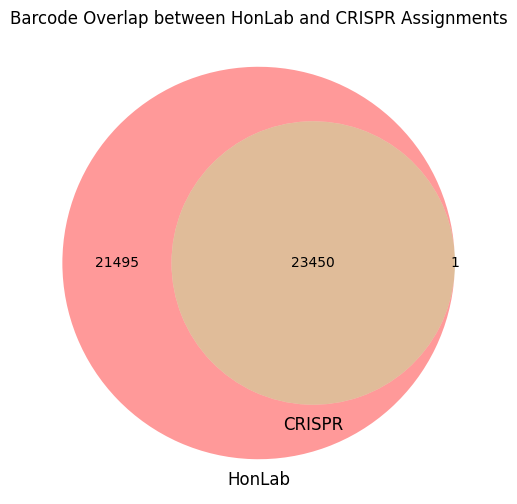

In [10]:
# Venn diagram of barcodes
plt.figure(figsize=(6,6))
venn3(subsets = (len(hon_only), len(crispr_only), len(overlap), 0, 0, 0, 0), set_labels = ('HonLab', 'CRISPR'))
plt.title("Barcode Overlap between HonLab and CRISPR Assignments")
plt.show()

# Align guide IDs

In [11]:
crispr_spacer_mp = guide.var.set_index("spacer")["guide_id"].to_dict()
crispr_spacer_mp


{'GAGAGCGAGCGCGCAACGG': 'CD81#strong',
 'GAGAGCCAGCGCGCAACGG': 'CD81#weak',
 'CCGGACTCGGACGCGTGGT': 'CD151#strong',
 'CCGCTCGGCCGAGCTGTCG': 'CD151#weak',
 'CTGCGACTCGGCGGAGTCC': 'CD55#strong',
 'GTTGGAGTTTGCCCTCCTC': 'NGFRAP1#B',
 'AGGACCGAGAAGAGTGACA': 'NGFRAP1#A',
 'CTCAGAGCGTCGGGATATC': 'TFRC#A',
 'GAGTTAAGGCCTCGTCTAG': 'non-targeting_00642',
 'TCCCAGGCTCTCCACTATG': 'non-targeting_00718',
 'GACGCGTCTGCAAGAACGT': 'non-targeting_03631',
 'GGCATGGACCCGCGGCACG': 'non-targeting_03705',
 'CGTCCGAGGTACTGAATAA': 'non-targeting_01469',
 'TCTGACTCTCCGTCCACCA': 'non-targeting_02459',
 'AGCCCCGCCTGGGTACGCG': 'non-targeting_00166',
 'GGCACCGCCGTTAAAAGTT': 'non-targeting_01967',
 'CTACAACCGGCGAGCGATA': 'non-targeting_02577',
 'TAACTGCTACGGCGCCCAA': 'non-targeting_00954',
 'GGATCAGTGAGGTCGGCCT': 'non-targeting_02829',
 'GGTTCGAGCCAGAGACCGG': 'non-targeting_03368',
 'CTATCCTAGACGAAAATCG': 'non-targeting_02691',
 'CTACCCGGGTAGTGGCGAG': 'non-targeting_01981',
 'GGTGGCCTGAGCTAGTACA': 'non-targeting_01

In [12]:
def revcomp(seq):
    complement = str.maketrans('ATCG', 'TAGC')
    return seq.translate(complement)[::-1]

In [13]:
pd.Index([revcomp(s) for s in hon_df.columns.str.split("_").str[-1].tolist()]).map(crispr_spacer_mp)

Index(['CD151#strong', 'CD151#weak', 'CD55#strong', 'CD81#strong', 'CD81#weak',
       'NGFRAP1#B', 'NGFRAP1#A', 'TFRC#A',
       'TCF7L2#chr10:112950246-112950264(-)',
       'TCF7L2#chr10:112950261-112950279(-)',
       ...
       'non-targeting_02829', 'non-targeting_03129', 'non-targeting_03306',
       'non-targeting_03347', 'non-targeting_03368', 'non-targeting_03484',
       'non-targeting_03631', 'non-targeting_03639', 'non-targeting_03705',
       'non-targeting_03783'],
      dtype='object', length=415)

In [14]:
# Map hon_lab spacers to guide IDs
hon_df.columns = pd.Index([revcomp(s) for s in hon_df.columns.str.split("_").str[-1].tolist()]).map(crispr_spacer_mp)
#hon_df.columns = pd.Index([s for s in hon_df.columns.str.split("_").str[-1].tolist()]).map(crispr_spacer_mp)
hon_df.columns.isna().sum()  # Check for unmapped guides

np.int64(0)

# Create aligned matrices

In [15]:
crispr_df.columns = crispr_df.columns.str.split("|").str[0]

In [16]:
intersecting_guides = hon_df.columns.intersection(crispr_df.columns)
len(intersecting_guides)

415

In [17]:
intersecting_barcodes = hon_df.index.intersection(crispr_df.index)
len(intersecting_barcodes)

23450

In [18]:
# Align barcodes and guides for both datasets
crispr_sub = crispr_df.loc[intersecting_barcodes, intersecting_guides].copy()
hon_sub = hon_df.loc[intersecting_barcodes, intersecting_guides].copy()
crispr_sub.shape, hon_sub.shape

((23450, 415), (23450, 415))

# Per-guide correlation

Correlation of total UMIs across all cells per guide: 0.9993869859075346


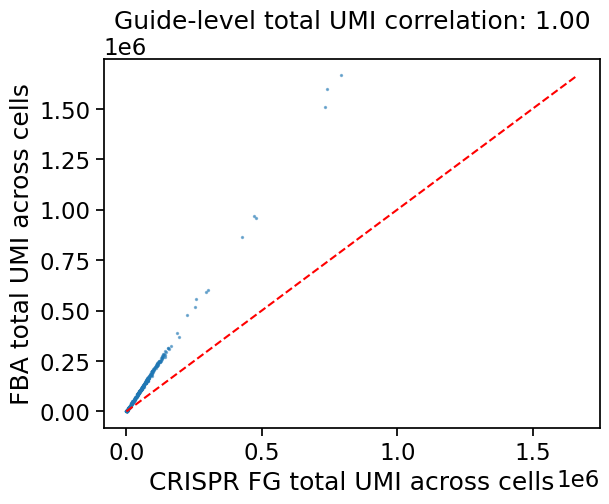

In [47]:
with sns.plotting_context("notebook", font_scale=1.5):
    
    # Per-guide counts
    fg_guide_counts = np.array(crispr_sub.sum(0)).ravel()
    fba_guide_counts = np.array(hon_sub.sum(0)).ravel()

    # Correlation
    guide_corr = np.corrcoef(fg_guide_counts, fba_guide_counts)[0,1]
    print("Correlation of total UMIs across all cells per guide:", guide_corr)

    # Scatter plot
    plt.scatter(fg_guide_counts, fba_guide_counts, s=2, alpha=0.5)
    #plt.xscale("log")
    #plt.yscale("log")
    
    # Plot y=x line
    max_val = max(fg_guide_counts.max(), fba_guide_counts.max())
    min_val = min(fg_guide_counts.min(), fba_guide_counts.min())
    plt.plot([min_val, max_val], [min_val, max_val], color="red", linestyle="--")
    
    # 
    plt.xlabel("CRISPR FG total UMI across cells")
    plt.ylabel("FBA total UMI across cells")
    plt.title(f"Guide-level total UMI correlation: {guide_corr:.2f}")
    plt.show()

In [48]:
# Find guides were log(total counts) is < 0.1 for CRISPR but > 0.1 for FBA
low_crispr_high_hon_guides = intersecting_guides[
    (np.log1p(fg_guide_counts) < 50) &
    (np.log1p(fba_guide_counts) > 100)
]
low_crispr_high_hon_guides

Index([], dtype='object')

Correlation of mean UMIs across all cells per guide: 0.9993869859075344


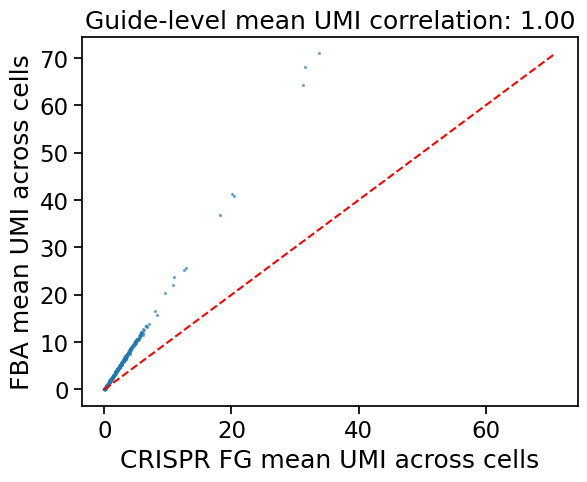

In [49]:
with sns.plotting_context("notebook", font_scale=1.5):
    
    # Per-guide means
    fg_guide_means = np.array(crispr_sub.mean(0)).ravel()
    fba_guide_means = np.array(hon_sub.mean(0)).ravel()

    # Correlation
    guide_corr = np.corrcoef(fg_guide_means, fba_guide_means)[0,1]
    print("Correlation of mean UMIs across all cells per guide:", guide_corr)

    # Scatter plot
    plt.scatter(fg_guide_means, fba_guide_means, s=2, alpha=0.5)
    #plt.xscale("log")
    #plt.yscale("log")
    
    # Plot y=x line
    max_val = max(fg_guide_means.max(), fba_guide_means.max())
    min_val = min(fg_guide_means.min(), fba_guide_means.min())
    plt.plot([min_val, max_val], [min_val, max_val], color="red", linestyle="--")
    
    # 
    plt.xlabel("CRISPR FG mean UMI across cells")
    plt.ylabel("FBA mean UMI across cells")
    plt.title(f"Guide-level mean UMI correlation: {guide_corr:.2f}")
    plt.show()

In [53]:
# 
low_crispr_high_hon_guides = intersecting_guides[
    (fg_guide_means < 1) &
    (fba_guide_means > 2)
]
low_crispr_high_hon_guides

Index(['TCF7L2#chr10:112950261-112950279(-)'], dtype='object')

In [54]:
# Give me a table of total and mean umi counts for these guides
df = pd.DataFrame({
    "CRISPR_total_UMIs": fg_guide_counts,
    "FBA_total_UMIs": fba_guide_counts,
    "CRISPR_mean_UMIs": fg_guide_means,
    "FBA_mean_UMIs": fba_guide_means
},
    index=intersecting_guides
)
df.loc[low_crispr_high_hon_guides]

,CRISPR_total_UMIs,FBA_total_UMIs,CRISPR_mean_UMIs,FBA_mean_UMIs
TCF7L2#chr10:112950261-112950279(-),20139.0,53717,0.858806,2.290704


Correlation of mean UMIs across all cells per guide: 0.9993869859075344


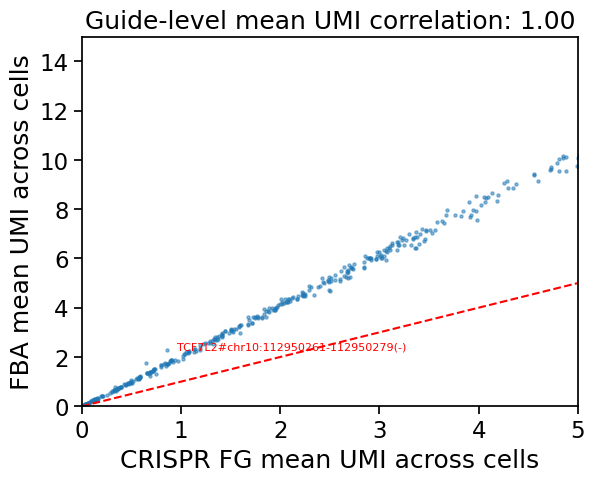

In [55]:
with sns.plotting_context("notebook", font_scale=1.5):
    
    # Per-guide means
    fg_guide_means = np.array(crispr_sub.mean(0)).ravel()
    fba_guide_means = np.array(hon_sub.mean(0)).ravel()

    # Correlation
    guide_corr = np.corrcoef(fg_guide_means, fba_guide_means)[0,1]
    print("Correlation of mean UMIs across all cells per guide:", guide_corr)

    # Scatter plot
    plt.scatter(fg_guide_means, fba_guide_means, s=5, alpha=0.5)
    plt.xlim(0, 5)
    plt.ylim(0, 15)
    #plt.xscale("log")
    #plt.yscale("log")
    
    # Label low_crispr_high_hon_guides
    for guide in low_crispr_high_hon_guides:
        x = fg_guide_means[intersecting_guides.get_loc(guide)]
        y = fba_guide_means[intersecting_guides.get_loc(guide)]
        plt.text(x+0.1, y, guide, fontsize=8, color="red")

    # Plot y=x line
    max_val = max(fg_guide_means.max(), fba_guide_means.max())
    min_val = min(fg_guide_means.min(), fba_guide_means.min())
    plt.plot([min_val, max_val], [min_val, max_val], color="red", linestyle="--")
    
    # 
    plt.xlabel("CRISPR FG mean UMI across cells")
    plt.ylabel("FBA mean UMI across cells")
    plt.title(f"Guide-level mean UMI correlation: {guide_corr:.2f}")
    plt.show()

# Per-barcode correlation

Correlation of total UMIs per cell: 0.9922854146765285


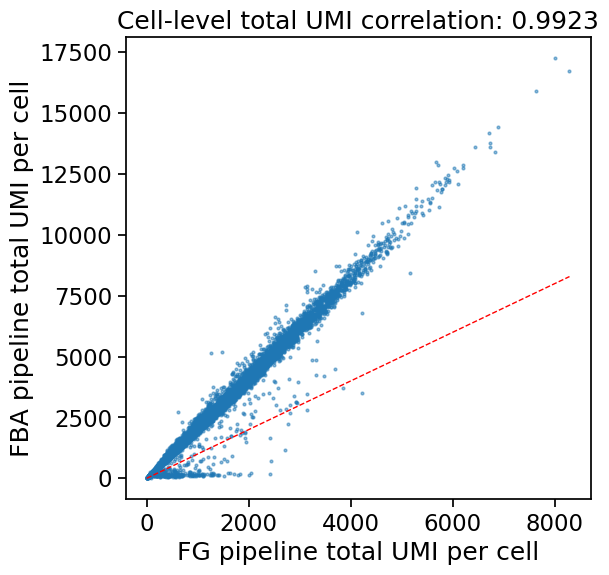

In [25]:
with sns.plotting_context("notebook", font_scale=1.5):
    
    # Per-cell counts
    fg_cell_counts = np.array(crispr_sub.sum(1)).ravel()
    fba_cell_counts = np.array(hon_sub.sum(1)).ravel()

    # Correlation
    cell_corr = np.corrcoef(fg_cell_counts, fba_cell_counts)[0,1]
    print("Correlation of total UMIs per cell:", cell_corr)

    # Scatter plot
    plt.figure(figsize=(6,6))
    plt.scatter(fg_cell_counts, fba_cell_counts, s=4, alpha=0.5)
    #plt.xscale("log")
    #plt.yscale("log")

    # Extras
    plt.xlabel("FG pipeline total UMI per cell")
    plt.ylabel("FBA pipeline total UMI per cell")
    plt.title(f"Cell-level total UMI correlation: {cell_corr:.4f}")
    plt.plot([min(fg_cell_counts), max(fg_cell_counts)],
             [min(fg_cell_counts), max(fg_cell_counts)],
             'r--', lw=1)  # identity line
    plt.show()

Correlation of mean UMIs per cell: 0.9922854146765281


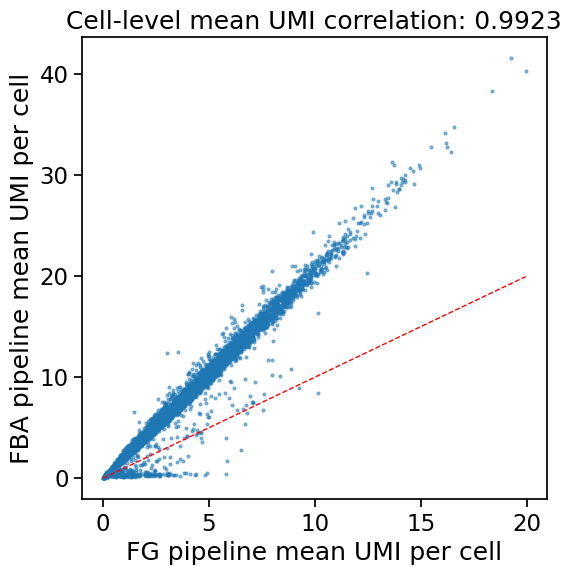

In [26]:
with sns.plotting_context("notebook", font_scale=1.5):
    
    # Per-cell means
    fg_cell_means = np.array(crispr_sub.mean(1)).ravel()
    fba_cell_means = np.array(hon_sub.mean(1)).ravel()

    # Correlation
    cell_corr = np.corrcoef(fg_cell_means, fba_cell_means)[0,1]
    print("Correlation of mean UMIs per cell:", cell_corr)

    # Scatter plot
    plt.figure(figsize=(6,6))
    plt.scatter(fg_cell_means, fba_cell_means, s=4, alpha=0.5)
    #plt.xscale("log")
    #plt.yscale("log")

    # Extras
    plt.xlabel("FG pipeline mean UMI per cell")
    plt.ylabel("FBA pipeline mean UMI per cell")
    plt.title(f"Cell-level mean UMI correlation: {cell_corr:.4f}")
    plt.plot([min(fg_cell_means), max(fg_cell_means)],
             [min(fg_cell_means), max(fg_cell_means)],
             'r--', lw=1)  # identity line
    plt.show()

# Barcode and guide level

/tmp/ipykernel_3308239/2980315452.py:3: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  fg_cell_expr = crispr_sub.iloc[cell_idx,:].ravel()
/tmp/ipykernel_3308239/2980315452.py:4: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  hon_cell_expr = hon_sub.iloc[cell_idx,:].ravel()


guide UMI correlation for cell CCAGCGAGTAGCCTAT: 1.0000


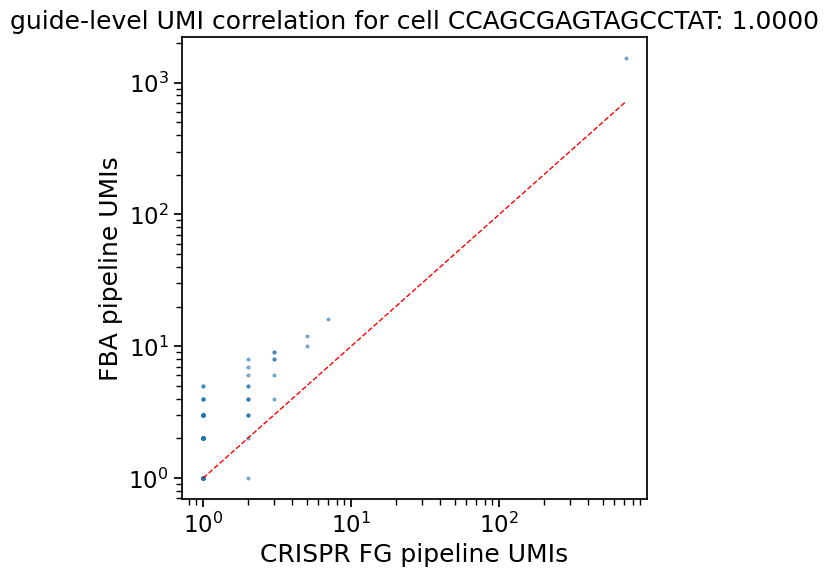

In [28]:
# Pick a random cell and plot correlation across all guides
cell_idx = np.random.choice(len(crispr_sub), size=1)[0]
fg_cell_expr = crispr_sub.iloc[cell_idx,:].ravel()
hon_cell_expr = hon_sub.iloc[cell_idx,:].ravel()

cell_guide_corr = pearsonr(fg_cell_expr, hon_cell_expr)[0]
print(f"guide UMI correlation for cell {crispr_sub.index[cell_idx]}: {cell_guide_corr:.4f}")

with sns.plotting_context("notebook", font_scale=1.5):
    plt.figure(figsize=(6,6))
    plt.scatter(fg_cell_expr, hon_cell_expr, s=4, alpha=0.5)
    plt.xscale("log")
    plt.yscale("log")
    plt.xlabel("CRISPR FG pipeline UMIs")
    plt.ylabel("FBA pipeline UMIs")
    plt.title(f"guide-level UMI correlation for cell {crispr_sub.index[cell_idx]}: {cell_guide_corr:.4f}")
    plt.plot([min(fg_cell_expr[fg_cell_expr>0]), max(fg_cell_expr)],
            [min(fg_cell_expr[fg_cell_expr>0]), max(fg_cell_expr)],
            'r--', lw=1)  # identity line
    plt.show()

/tmp/ipykernel_3308239/2479205168.py:5: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  fg_cell_expr = crispr_sub.iloc[cell_idx,:].ravel()
/tmp/ipykernel_3308239/2479205168.py:6: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  cr_cell_expr = hon_sub.iloc[cell_idx,:].ravel()


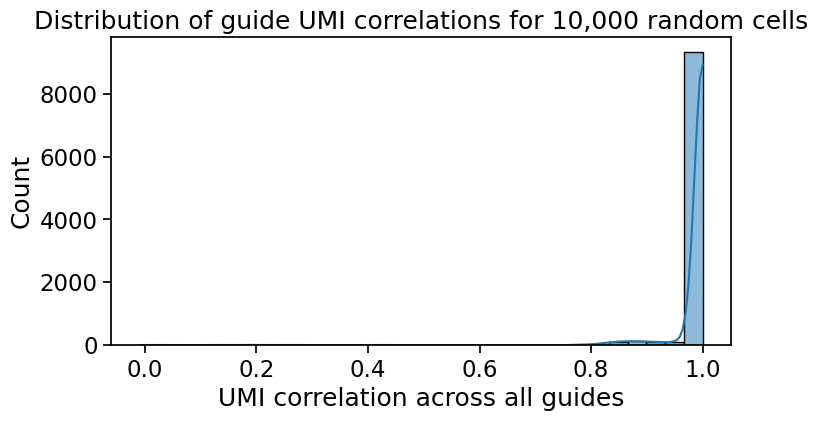

In [29]:
# Do the same thing for 10,000 cells and plot distribution of correlations
cell_indices = np.random.choice(len(crispr_sub), size=10_000, replace=False)
cell_guide_corrs = []
for cell_idx in cell_indices:
    fg_cell_expr = crispr_sub.iloc[cell_idx,:].ravel()
    cr_cell_expr = hon_sub.iloc[cell_idx,:].ravel()
    cell_guide_corr = pearsonr(fg_cell_expr, cr_cell_expr)[0]
    cell_guide_corrs.append(cell_guide_corr)

with sns.plotting_context("notebook", font_scale=1.5):
    plt.figure(figsize=(8,4))
    sns.histplot(cell_guide_corrs, bins=30, kde=True)
    plt.xlabel("UMI correlation across all guides")
    plt.title("Distribution of guide UMI correlations for 10,000 random cells")
    plt.show()

/tmp/ipykernel_3308239/807703527.py:3: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  fg_guide_expr = crispr_sub.iloc[:,guide_idx].ravel()
/tmp/ipykernel_3308239/807703527.py:4: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  hon_guide_expr = hon_sub.iloc[:,guide_idx].ravel()


cell UMI correlation for guide CTNNB1#chr3:41199692-41199710(-): 0.9933


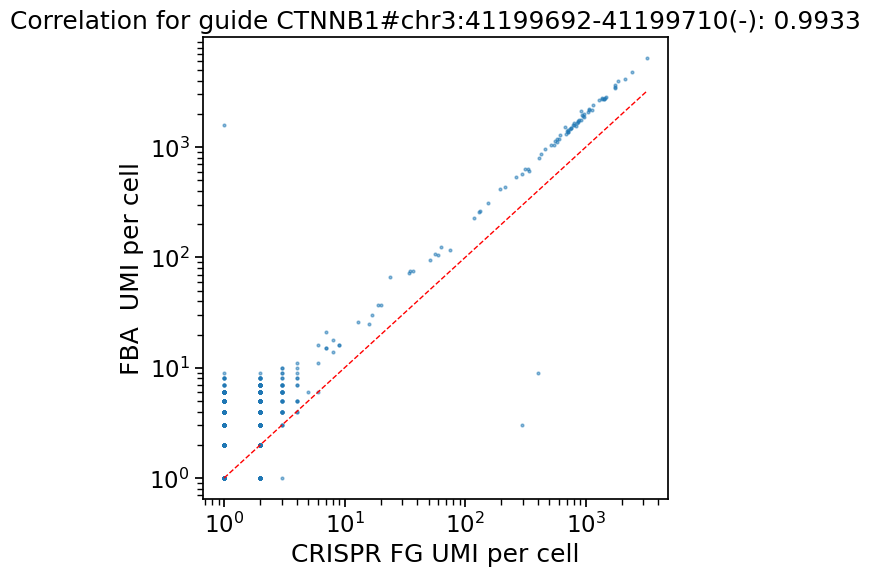

In [30]:
# Pick a random guide and plot correlation across all cells
guide_idx = np.random.choice(len(crispr_sub.columns), size=1)[0]
fg_guide_expr = crispr_sub.iloc[:,guide_idx].ravel()
hon_guide_expr = hon_sub.iloc[:,guide_idx].ravel()
guide_cell_corr = pearsonr(fg_guide_expr, hon_guide_expr)[0]
print(f"cell UMI correlation for guide {crispr_sub.columns[guide_idx]}: {guide_cell_corr:.4f}")

with sns.plotting_context("notebook", font_scale=1.5):
    plt.figure(figsize=(6,6))
    plt.scatter(fg_guide_expr, hon_guide_expr, s=4, alpha=0.5)
    plt.xscale("log")
    plt.yscale("log")
    plt.xlabel("CRISPR FG UMI per cell")
    plt.ylabel("FBA  UMI per cell")
    plt.title(f"Correlation for guide {crispr_sub.columns[guide_idx]}: {guide_cell_corr:.4f}")
    plt.plot([min(fg_guide_expr[fg_guide_expr>0]), max(fg_guide_expr)],
            [min(fg_guide_expr[fg_guide_expr>0]), max(fg_guide_expr)],
            'r--', lw=1)  # identity line
    plt.show()

/tmp/ipykernel_3308239/3020267704.py:4: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  fg_guide_expr = crispr_sub[guide].ravel()
/tmp/ipykernel_3308239/3020267704.py:5: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  cr_guide_expr = hon_sub[guide].ravel()


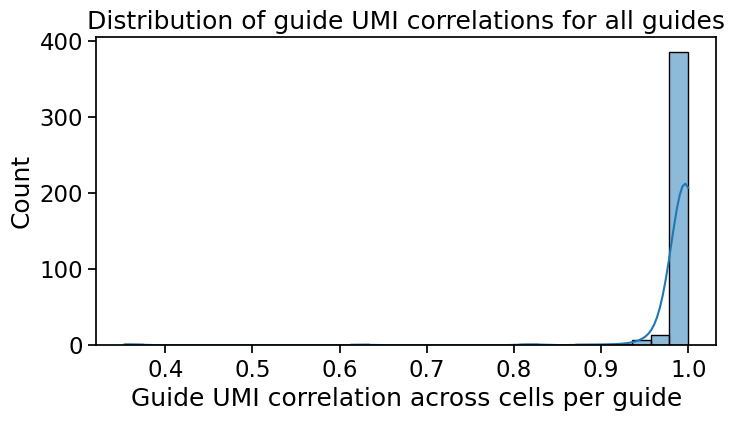

In [31]:
# Do the same thing for all the guides
guide_cell_corrs = []
for guide in intersecting_guides:
    fg_guide_expr = crispr_sub[guide].ravel()
    cr_guide_expr = hon_sub[guide].ravel()
    guide_cell_corr = pearsonr(fg_guide_expr, cr_guide_expr)[0]
    guide_cell_corrs.append(guide_cell_corr)

with sns.plotting_context("notebook", font_scale=1.5):
    plt.figure(figsize=(8,4))
    sns.histplot(guide_cell_corrs, bins=30, kde=True)
    plt.xlabel("Guide UMI correlation across cells per guide")
    plt.title("Distribution of guide UMI correlations for all guides")
    plt.show()


In [32]:
# Which guides are lower than 0.9 correlation? ALso get their corrrelations
low_corr_guides = [intersecting_guides[i] for i, corr in enumerate(guide_cell_corrs) if corr < 0.9]
low_corr_values = [corr for corr in guide_cell_corrs if corr < 0.9]
low_corr_dict = dict(zip(low_corr_guides, low_corr_values))
low_corr_dict

{'NANOG#chr12:7789786-7789804(-)': np.float64(0.3532964691250017),
 'TCF12#chr15:56918702-56918720(-)': np.float64(0.8225576418921483),
 'TFCP2L1#chr2:121284793-121284811(-)': np.float64(0.35818259417808274),
 'CTNNB1#chr3:41199540-41199558(+)': np.float64(0.8793436618862114),
 'SMARCC1#chr3:47781830-47781848(-)': np.float64(0.8164837165229515),
 'POU5F1#chr6:31170702-31170720(-)': np.float64(0.6255049644529184)}

/tmp/ipykernel_3308239/3878247738.py:3: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  fg_guide_expr = crispr_sub.loc[:, guide_id].ravel()
/tmp/ipykernel_3308239/3878247738.py:4: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  cr_guide_expr = hon_sub.loc[:, guide_id].ravel()


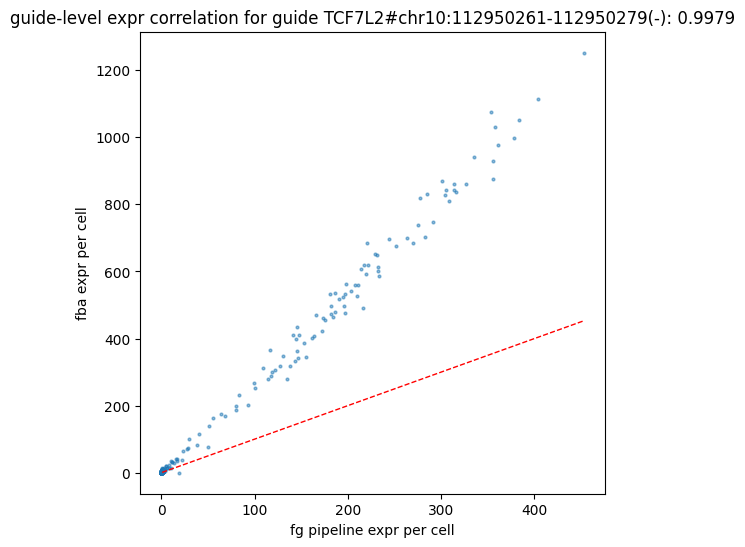

In [38]:
# plot the first one
guide_id = "TCF7L2#chr10:112950261-112950279(-)"
fg_guide_expr = crispr_sub.loc[:, guide_id].ravel()
cr_guide_expr = hon_sub.loc[:, guide_id].ravel()
plt.figure(figsize=(6,6))
plt.scatter(fg_guide_expr, cr_guide_expr, s=4, alpha=0.5)
#plt.xscale("log")
#plt.yscale("log")
plt.xlabel("fg pipeline expr per cell")
plt.ylabel("fba expr per cell")
plt.title(f"guide-level expr correlation for guide {guide_id}: {pearsonr(fg_guide_expr, cr_guide_expr)[0]:.4f}")
plt.plot([min(fg_guide_expr[fg_guide_expr>0]), max(fg_guide_expr)],
         [min(fg_guide_expr[fg_guide_expr>0]), max(fg_guide_expr)],
         'r--', lw=1)  # identity line
plt.show()

/tmp/ipykernel_3308239/76568668.py:7: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  fg_guide_counts = crispr_sub.loc[:, guide_id].ravel()
/tmp/ipykernel_3308239/76568668.py:8: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  cr_guide_counts = hon_sub.loc[:, guide_id].ravel()


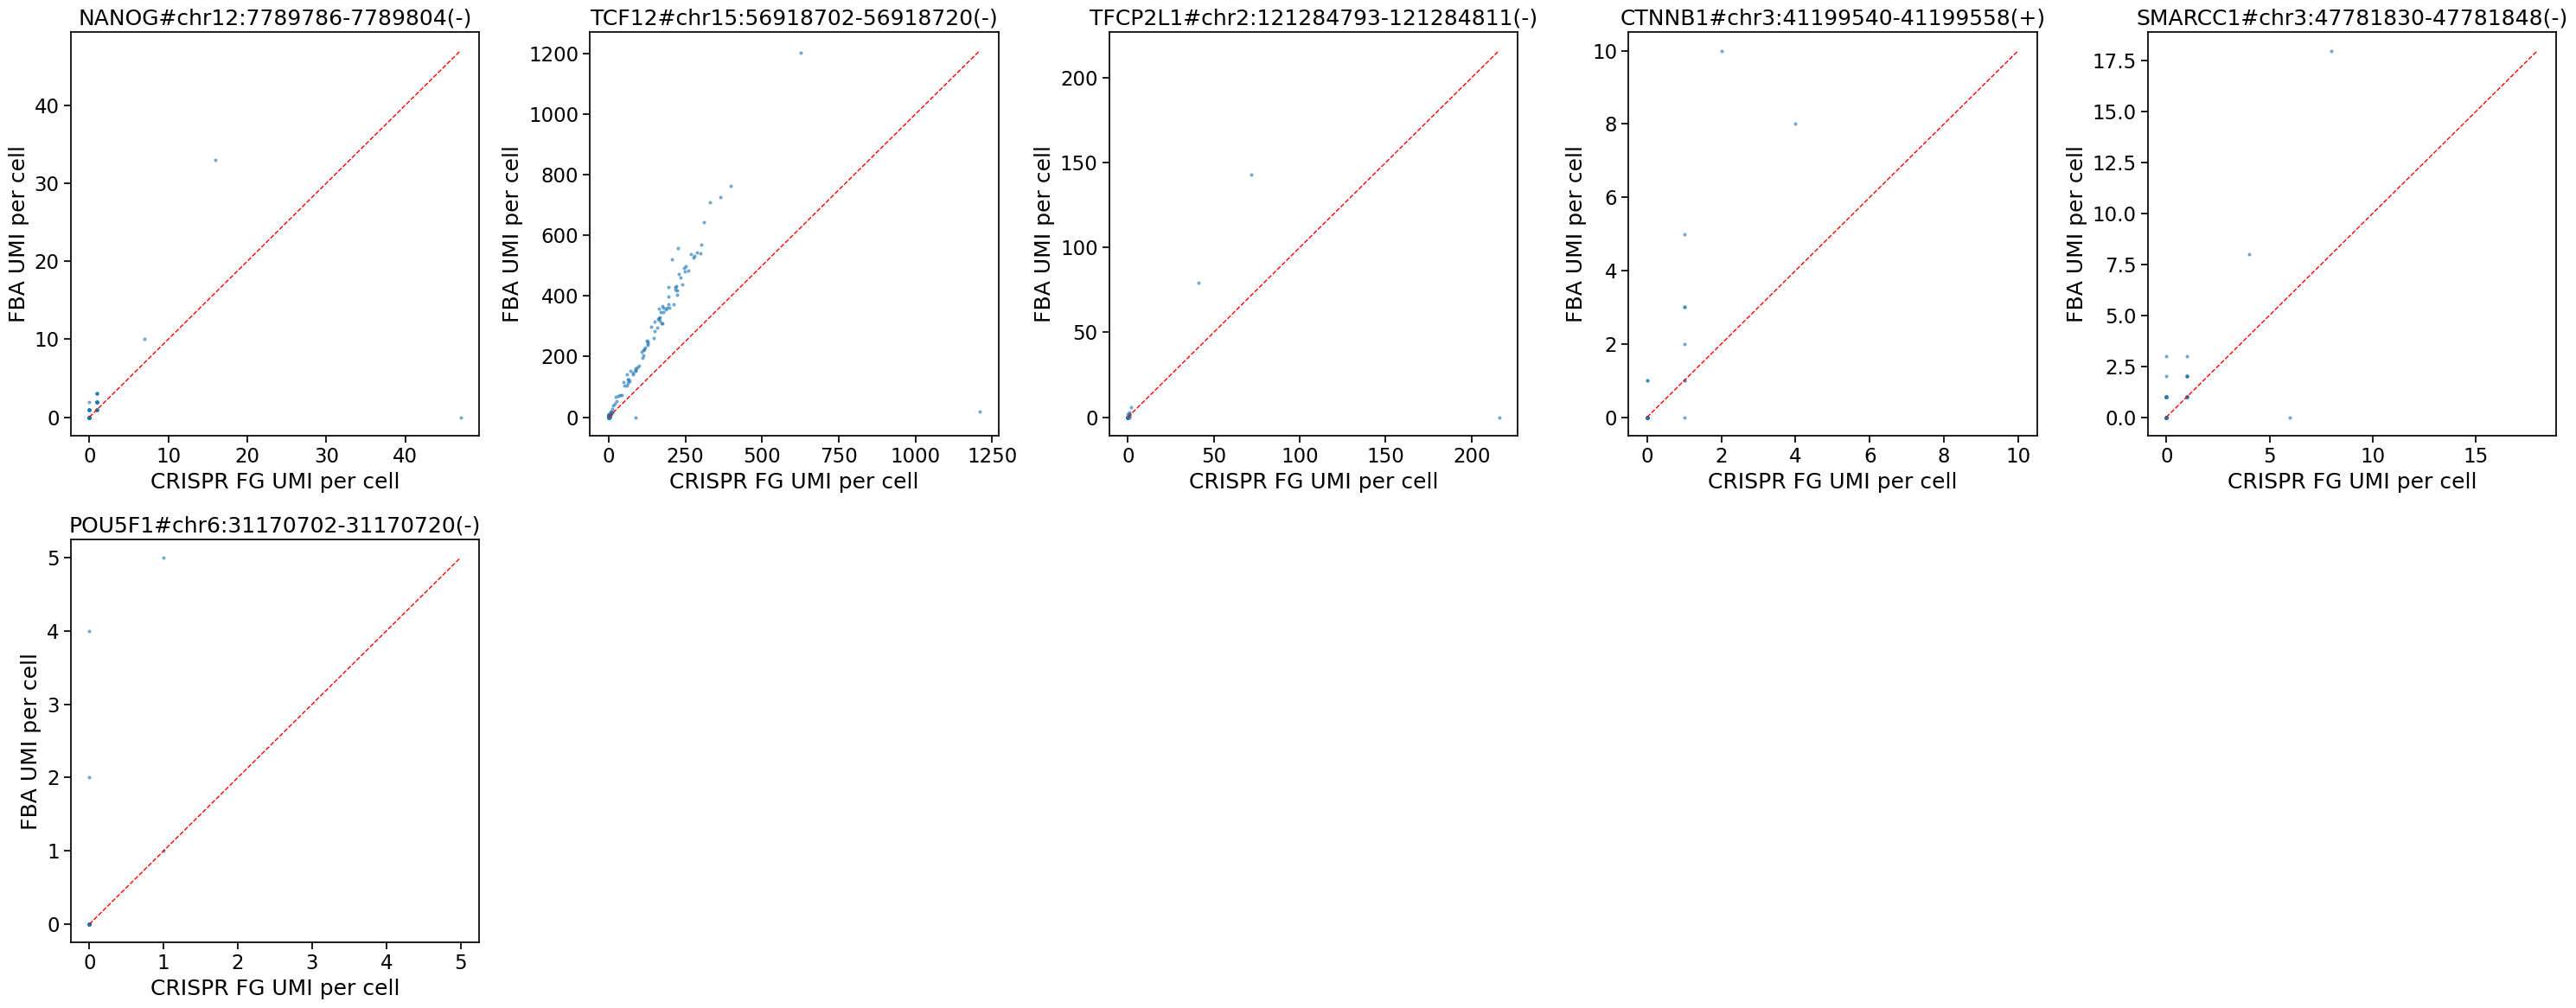

In [34]:
# Plot all of them in one nice plot with multiple panels
with sns.plotting_context("notebook", font_scale=1.5):
    n_cols = 5
    n_rows = len(low_corr_guides) // n_cols + 1
    plt.figure(figsize=(n_cols * 6, n_rows * 6))
    for i, guide_id in enumerate(low_corr_guides):
        fg_guide_counts = crispr_sub.loc[:, guide_id].ravel()
        cr_guide_counts = hon_sub.loc[:, guide_id].ravel()
        plt.subplot(n_rows, n_cols, i + 1)
        plt.scatter(fg_guide_counts, cr_guide_counts, s=4, alpha=0.5)
        plt.xlabel("CRISPR FG UMI per cell")
        plt.ylabel("FBA UMI per cell")
        plt.title(f"{guide_id}")
        plt.plot([0, max(fg_guide_counts.max(), cr_guide_counts.max())],
                 [0, max(fg_guide_counts.max(), cr_guide_counts.max())],
                 'r--', lw=1)  # identity line
    plt.tight_layout()
    plt.show()

/tmp/ipykernel_3308239/598339973.py:3: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  fg_guide_expr = crispr_sub.loc[:, guide_id].ravel()
/tmp/ipykernel_3308239/598339973.py:4: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  cr_guide_expr = hon_sub.loc[:, guide_id].ravel()


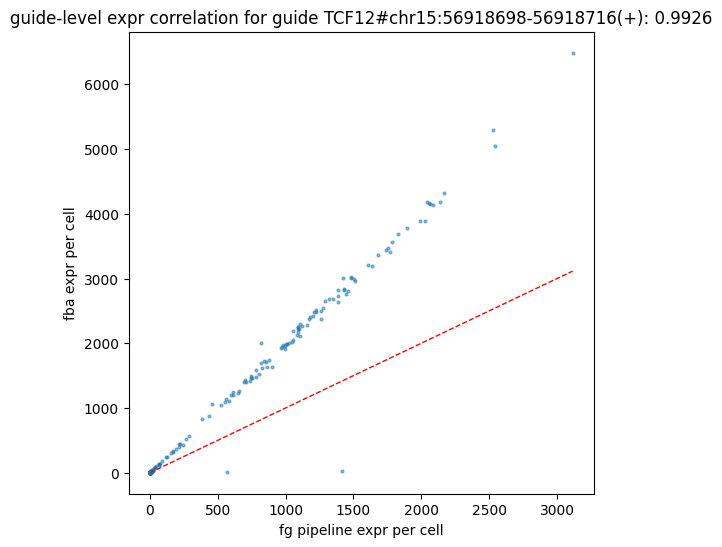

In [36]:
# plot the first one
guide_id = "TCF12#chr15:56918698-56918716(+)"
fg_guide_expr = crispr_sub.loc[:, guide_id].ravel()
cr_guide_expr = hon_sub.loc[:, guide_id].ravel()
plt.figure(figsize=(6,6))
plt.scatter(fg_guide_expr, cr_guide_expr, s=4, alpha=0.5)
#plt.xscale("log")
#plt.yscale("log")
plt.xlabel("fg pipeline expr per cell")
plt.ylabel("fba expr per cell")
plt.title(f"guide-level expr correlation for guide {guide_id}: {pearsonr(fg_guide_expr, cr_guide_expr)[0]:.4f}")
plt.plot([min(fg_guide_expr[fg_guide_expr>0]), max(fg_guide_expr)],
         [min(fg_guide_expr[fg_guide_expr>0]), max(fg_guide_expr)],
         'r--', lw=1)  # identity line
plt.show()

/tmp/ipykernel_3308239/1768767741.py:3: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  fg_guide_expr = crispr_sub.loc[:, guide_id].ravel()
/tmp/ipykernel_3308239/1768767741.py:4: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  cr_guide_expr = hon_sub.loc[:, guide_id].ravel()


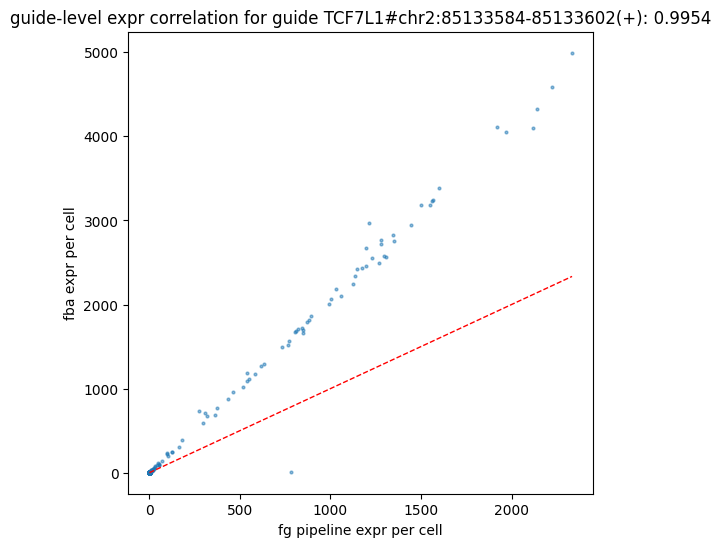

In [37]:
# plot the first one
guide_id = "TCF7L1#chr2:85133584-85133602(+)"
fg_guide_expr = crispr_sub.loc[:, guide_id].ravel()
cr_guide_expr = hon_sub.loc[:, guide_id].ravel()
plt.figure(figsize=(6,6))
plt.scatter(fg_guide_expr, cr_guide_expr, s=4, alpha=0.5)
#plt.xscale("log")
#plt.yscale("log")
plt.xlabel("fg pipeline expr per cell")
plt.ylabel("fba expr per cell")
plt.title(f"guide-level expr correlation for guide {guide_id}: {pearsonr(fg_guide_expr, cr_guide_expr)[0]:.4f}")
plt.plot([min(fg_guide_expr[fg_guide_expr>0]), max(fg_guide_expr)],
         [min(fg_guide_expr[fg_guide_expr>0]), max(fg_guide_expr)],
         'r--', lw=1)  # identity line
plt.show()

# DONE!

---